# **Ozone Pollution Analysis & Recommendations**

**Background:**
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

# **Executive Summary:**
**Insights:**
Ozone concentration peaks during summer months (June–August).
Weekdays show slightly higher ozone levels than weekends, likely due to traffic/emissions.
Riverside, Tulare, and San Bernardino countries have consistently high ozone levels.

**Recommendations:**
Encourage public transport and low-emission zones in high-risk counties.
Increase monitoring coverage during summer.
Promote weekend-style traffic restrictions on weekdays in polluted areas.

# **Introduction:**
Ozone pollution is a major concern for public health, especially in urban and industrial regions.
This notebook analyzes daily ozone air quality data across various counties in California, aiming to identify spatial and temporal patterns in pollution levels.

**We investigate:**
Seasonal variations (e.g. higher levels during summer)
Weekday vs. weekend differences
High-risk counties with consistently elevated ozone levels
Our goal is to uncover actionable insights that can support environmental policy and improve air quality monitoring and control efforts.

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

Saving ozone (1).csv to ozone (1).csv


In [2]:
df = pd.read_csv("ozone (1).csv")

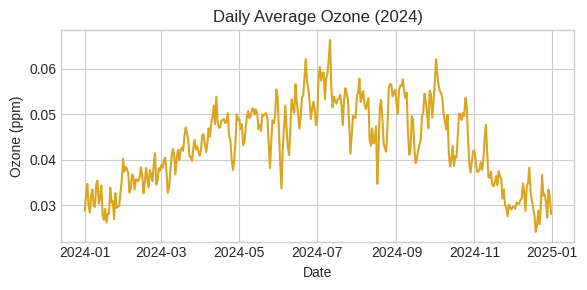

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ozone (1).csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean data
df = df[~df['date'].astype(str).str.match(r'^/?\d{4}$')]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['daily_max_8-hour_ozone_concentration'])

# Set a simple style for plots
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Daily Ozone Trend
daily_avg = df.groupby('date')['daily_max_8-hour_ozone_concentration'].mean().reset_index()

plt.figure(figsize=(6, 3))
plt.plot(daily_avg['date'], daily_avg['daily_max_8-hour_ozone_concentration'], color='goldenrod')
plt.title("Daily Average Ozone (2024)", fontsize=12)
plt.xlabel("Date")
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()

The daily average ozone concentration rises from January, peaks around July,
then gradually declines towards year-end, reflecting typical seasonal patterns influenced by sunlight. Values fluctuate between 0.03 and 0.06 ppm, showing natural variability due to weather and pollution.


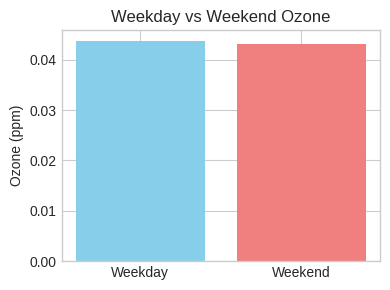

In [17]:
# 2. Weekday vs Weekend
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
weekend_avg = df.groupby('is_weekend')['daily_max_8-hour_ozone_concentration'].mean()

plt.figure(figsize=(4, 3))
plt.bar(['Weekday', 'Weekend'], weekend_avg.values, color=['skyblue', 'lightcoral'])
plt.title("Weekday vs Weekend Ozone", fontsize=12)
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()


Weekday ozone levels are slightly higher than weekend levels, which could be attributed to increased vehicular traffic and industrial activity during weekdays. The difference is small, indicating other factors may also influence ozone concentration.


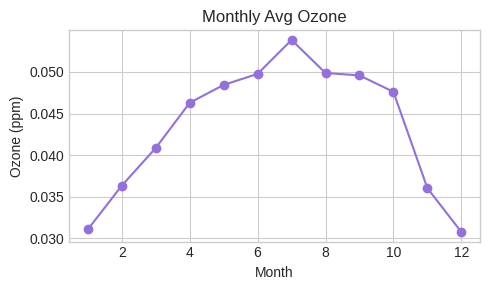

In [18]:
# 3. Monthly Trend
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['daily_max_8-hour_ozone_concentration'].mean()

plt.figure(figsize=(5, 3))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='mediumpurple')
plt.title("Monthly Avg Ozone", fontsize=12)
plt.xlabel("Month")
plt.ylabel("Ozone (ppm)")
plt.tight_layout()
plt.show()


 Average ozone concentration rises steadily from spring, peaking in June–July, and then declines towards winter. This seasonal pattern likely reflects stronger sunlight and higher temperatures in summer

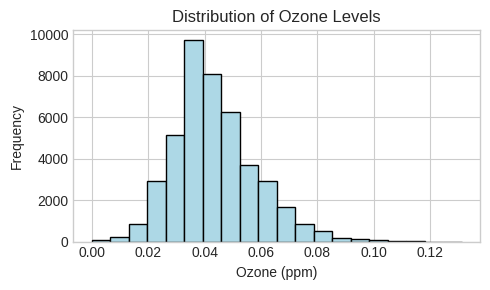

In [19]:
# 4.Histogram showing the distribution of ozone levels
plt.figure(figsize=(5,3))
plt.hist(df['daily_max_8-hour_ozone_concentration'], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Ozone Levels", fontsize=12)
plt.xlabel("Ozone (ppm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

 Ozone levels are mostly concentrated in the 0.03–0.05 ppm range, indicating this is the typical background level. Higher concentrations above 0.08 ppm are rare, suggesting extreme ozone events are uncommon.

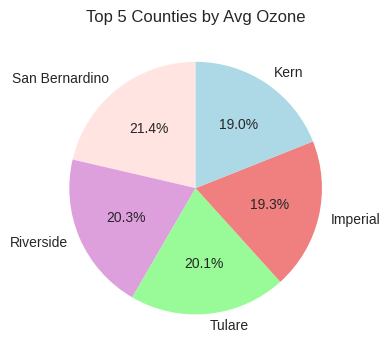

In [20]:
# 5.Pie chart showing the top 5 counties by average ozone levels
county_avg = df.groupby('county')['daily_max_8-hour_ozone_concentration'].mean().sort_values(ascending=False)
top5_counties = county_avg.head(5)

plt.figure(figsize=(4,4))
top5_counties.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['mistyrose','plum','palegreen','lightcoral','lightblue']
)
plt.title("Top 5 Counties by Avg Ozone")
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


The pie chart shows that San Bernardino has the highest average ozone share among the top 5 counties (21.4%), followed closely by Riverside (20.2%) and Tulare (20.1%). Kern (19.0%) and Imperial (19.3%) have slightly lower shares but still contribute significantly to high ozone averages in the region.


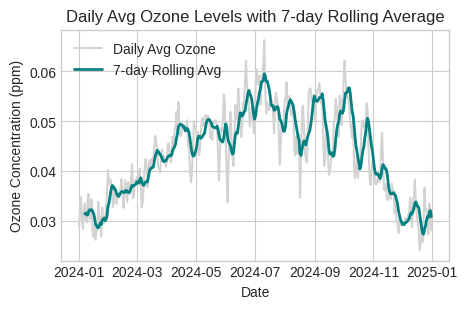

In [38]:
# 6.Rolling 30-day average ozone levels over time
daily_avg = df.groupby('date')['daily_max_8-hour_ozone_concentration'].mean().reset_index()

# Step 2: Compute rolling mean (7-day window)
daily_avg['ozone_roll'] = daily_avg['daily_max_8-hour_ozone_concentration'].rolling(window=7).mean()

# Step 3: Plot clean rolling graph
plt.figure(figsize=(5,3))
plt.plot(daily_avg['date'], daily_avg['daily_max_8-hour_ozone_concentration'],
         color='lightgray', label='Daily Avg Ozone')
plt.plot(daily_avg['date'], daily_avg['ozone_roll'],
         color='teal', linewidth=2, label='7-day Rolling Avg')

plt.title("Daily Avg Ozone Levels with 7-day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Ozone Concentration (ppm)")
plt.legend()
plt.grid(True)
plt.show()

The 7-day rolling average smooths daily ozone fluctuations, highlighting overall trends. Levels rise gradually, peaking mid-year, and then decline, indicating clear seasonal patterns.
